### Importing packages

In [3]:
import matplotlib.pyplot as plt; import numpy as np; import netCDF4; from netCDF4 import Dataset
import pandas as pd; import numpy.ma as ma; import time as timeit; import os; import math
import itertools; import scipy.io; import mat73; import collections
import cartopy; import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import AutoMinorLocator; from matplotlib.ticker import FixedLocator
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
%matplotlib inline
import statistics; import xarray as xr;from scipy.interpolate import griddata

### Polygon y is Eastern Gulf of Maine

In [4]:
y = open("bndgme.txt", "r", encoding="utf-8")
y.read()
y = '  41.80   68.00\n  42.10   67.50\n  42.10   67.00\n  42.10   66.00\n  43.00   66.00\n  44.20   66.50\n  44.20   67.00\n  44.20   68.00\n  41.80   68.00\n'
output1y = y.split('\n')

newy = [] 
for string in output1y:
    output2y = string.split(' ')
    newy.append(output2y)
newy = [['', '', '41.80', '', '', '68.00'], ['', '', '42.10', '', '', '67.50'], ['', '', '42.10', '', '', '67.00'], ['', '', '42.10', '', '', '66.00'], ['', '', '43.00', '', '', '66.00'], ['', '', '44.20', '', '', '66.50'], ['', '', '44.20', '', '', '67.00'], ['', '', '44.20', '', '', '68.00'], ['', '', '41.80', '', '', '68.00']]
lon_y = []; lat_y = []

for i in range(9): 
    y1 = newy[i][2]
    lat_y.append(y1)
    y3 = newy[i][5]
    lon_y.append(y3)
lonlist_y = [float(i) for i in lon_y]; latlist_y = [float(i) for i in lat_y]
df_y = pd.DataFrame({'lon': lonlist_y, 'lat': latlist_y,})

lonlist_y_plot = [float(i)*-1 for i in lon_y]; latlist_y = [float(i) for i in lat_y]
df_y_plot = pd.DataFrame({'lon': lonlist_y_plot, 'lat': latlist_y,})
x_y = df_y_plot['lon']; y_y = df_y_plot['lat']

lonlist_yneg = [float(i)*-1 for i in lon_y]
df_y_plottable = pd.DataFrame({'lon': lonlist_yneg, 'lat': latlist_y,})

In [5]:
polygon_y = Polygon(df_y.values)
print(polygon_y)

POLYGON ((68 41.8, 67.5 42.1, 67 42.1, 66 42.1, 66 43, 66.5 44.2, 67 44.2, 68 44.2, 68 41.8))


### Polygon t is Western Gulf of Maine

In [6]:
t = open("bndgmw.txt", "r", encoding="utf-8")
t.read()
t = '  42.20   70.50\n  42.00   70.00\n  41.10   69.00\n  41.80   68.00\n  44.20   68.00\n  43.90   69.00\n  43.70   70.00\n  43.00   70.50\n  42.20   70.50'
output1t = t.split('\n')
newt = [] 
for string in output1t:
    output2t = string.split(' ')
    newt.append(output2t)
lon_t = []; lat_t = []

for i in range(9): 
    t1 = newt[i][2]
    lat_t.append(t1)
    t3 = newt[i][5]
    lon_t.append(t3)
lonlist_t = [float(i) for i in lon_t]; latlist_t = [float(i) for i in lat_t]
df_t = pd.DataFrame({'lon': lonlist_t, 'lat': latlist_t,})

lonlist_t_plot = [float(i)*-1 for i in lon_t]; latlist_t = [float(i) for i in lat_t]
df_t_plot = pd.DataFrame({'lon': lonlist_t_plot, 'lat': latlist_t,})
x_t = df_t_plot['lon']; y_t = df_t_plot['lat']

In [7]:
polygon_t = Polygon(df_t.values)
print(polygon_t)

POLYGON ((70.5 42.2, 70 42, 69 41.1, 68 41.8, 68 44.2, 69 43.9, 70 43.7, 70.5 43, 70.5 42.2))


### Polgygon w is Georges Bank.

In [8]:
w = open("bndgb2.txt", "r", encoding="utf-8")
w.read()
w = '  40.00   69.50\n  40.30   68.00\n  40.40   67.50\n  40.60   67.00\n  40.80   66.50\n  41.45   66.00\n  41.80   65.70\n  42.10   66.00\n  42.10   67.00\n  42.10   67.50\n  41.80   68.00\n  41.10   69.00\n  41.00   69.50\n  40.00   69.50\n'
output1w = w.split('\n')

neww = [] 
for string in output1w:
    output2w = string.split(' ')
    neww.append(output2w)

neww = [['', '', '40.00', '', '', '69.50'], ['', '', '40.30', '', '', '68.00'], ['', '', '40.40', '', '', '67.50'], ['', '', '40.60', '', '', '67.00'], ['', '', '40.80', '', '', '66.50'], ['', '', '41.45', '', '', '66.00'], ['', '', '41.80', '', '', '65.70'], ['', '', '42.10', '', '', '66.00'], ['', '', '42.10', '', '', '67.00'], ['', '', '42.10', '', '', '67.50'], ['', '', '41.80', '', '', '68.00'], ['', '', '41.10', '', '', '69.00'], ['', '', '41.00', '', '', '69.50'], ['', '', '40.00', '', '', '69.50']]
lon_w = []; lat_w = []

for i in range(14): 
    w1 = neww[i][2]
    lat_w.append(w1)
    w3 = neww[i][5]
    lon_w.append(w3)
lonlist_w = [float(i) for i in lon_w]; latlist_w = [float(i) for i in lat_w]
lonlist_wneg = [float(i)*-1 for i in lon_w]
df_w = pd.DataFrame({'lon': lonlist_w, 'lat': latlist_w,})
df_w_plottable = pd.DataFrame({'lon': lonlist_wneg, 'lat': latlist_w,})


lonlist_w_plot = [float(i)*-1 for i in lon_w]; latlist_w = [float(i) for i in lat_w]
df_w_plot = pd.DataFrame({'lon': lonlist_w_plot, 'lat': latlist_w,})
x_w = df_w_plot['lon']; y_w = df_w_plot['lat']

In [9]:
polygon_w = Polygon(df_w.values)
print(polygon_w)

POLYGON ((69.5 40, 68 40.3, 67.5 40.4, 67 40.6, 66.5 40.8, 66 41.45, 65.7 41.8, 66 42.1, 67 42.1, 67.5 42.1, 68 41.8, 69 41.1, 69.5 41, 69.5 40))


### Polygon v is Southern MAB.

In [10]:
v = open("bndmbs.txt", "r", encoding="utf-8")
v.read()
v = '  37.00   76.00\n  36.00   75.50\n  35.50   75.00\n  36.00   74.75\n  37.40   74.50\n  39.50   72.00\n  40.50   74.00\n  39.40   74.25\n  37.00   76.00\n'
output1v = v.split('\n')

newv = [] 
for string in output1v:
    output2v = string.split(' ')
    newv.append(output2v)

newv = [['', '', '37.00', '', '', '76.00'], ['', '', '36.00', '', '', '75.50'], ['', '', '35.50', '', '', '75.00'], ['', '', '36.00', '', '', '74.75'], ['', '', '37.40', '', '', '74.50'], ['', '', '39.50', '', '', '72.00'], ['', '', '40.50', '', '', '74.00'], ['', '', '39.40', '', '', '74.25'], ['', '', '37.00', '', '', '76.00']]
lon_v = []; lat_v = []

for i in range(9): 
    v1 = newv[i][2]
    lat_v.append(v1)
    v3 = newv[i][5]
    lon_v.append(v3)
lonlist_v = [float(i) for i in lon_v]; latlist_v = [float(i) for i in lat_v]
df_v = pd.DataFrame({'lon': lonlist_v, 'lat': latlist_v,})

lonlist_v_plot = [float(i)*-1 for i in lon_v]; latlist_v = [float(i) for i in lat_v]
df_v_plot = pd.DataFrame({'lon': lonlist_v_plot, 'lat': latlist_v,})
x_v = df_v_plot['lon']; y_v = df_v_plot['lat']


lonlist_vneg = [float(i)*-1 for i in lon_v]
df_v_plottable = pd.DataFrame({'lon': lonlist_vneg, 'lat': latlist_v,})

In [11]:
polygon_v = Polygon(df_v.values.tolist())
print(polygon_v)

POLYGON ((76 37, 75.5 36, 75 35.5, 74.75 36, 74.5 37.4, 72 39.5, 74 40.5, 74.25 39.4, 76 37))


### Polygon x is Northern MAB.

In [12]:
x = open("bndmbn.txt", "r", encoding="utf-8")
x.read()
x = '  40.50   74.00\n  39.50   72.00\n  40.00   71.40\n  40.00   69.50\n  41.00   69.50\n  41.10   70.00\n  41.00   72.00\n  40.50   74.00\n'
output1x = x.split('\n')

newx = [] 
for string in output1x:
    output2x = string.split(' ')
    newx.append(output2x)
newx = [['', '', '40.50', '', '', '74.00'], ['', '', '39.50', '', '', '72.00'], ['', '', '40.00', '', '', '71.40'], ['', '', '40.00', '', '', '69.50'], ['', '', '41.00', '', '', '69.50'], ['', '', '41.10', '', '', '70.00'], ['', '', '41.00', '', '', '72.00'], ['', '', '40.50', '', '', '74.00']]
lon_x = []; lat_x = []

for i in range(8): 
    x1 = newx[i][2]
    lat_x.append(x1)
    x3 = newx[i][5]
    lon_x.append(x3)
lonlist_x = [float(i) for i in lon_x]; latlist_x = [float(i) for i in lat_x]
df_x = pd.DataFrame({'lon': lonlist_x, 'lat': latlist_x,})

lonlist_x_plot = [float(i)*-1 for i in lon_x]; latlist_x = [float(i) for i in lat_x]
df_x_plot = pd.DataFrame({'lon': lonlist_x_plot, 'lat': latlist_x,})
x_x = df_x_plot['lon']; y_x = df_x_plot['lat']

lonlist_xneg = [float(i)*-1 for i in lon_x]
df_x_plottable = pd.DataFrame({'lon': lonlist_xneg, 'lat': latlist_x,})

In [13]:
polygon_x = Polygon(df_x.values)
print(polygon_x)

POLYGON ((74 40.5, 72 39.5, 71.40000000000001 40, 69.5 40, 69.5 41, 70 41.1, 72 41, 74 40.5))


## TIMESERIES

In [845]:
finalfinaldepth = []; finalfinalratio = []; filteredMLDlist = []; meanfilteredMLDlist = []; stdfilteredMLDlist = []; years = []; bananasplitmean = []; bananasplitstd = [];floormean = [];floorstd = []; latfinal = []; lonfinal = []; ratiofinal = [];bottomdfinal = []; filteredfloorslist = [];zi_listofarrays = []
for year in range(1977,2020):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    finaldepth = []; finallat = [];finallon = []
    lat_intermediate = []; lon_intermediate = []; p_intermediate = []; t_intermediate = []; yd_intermediate = []
    seasonyeardepth = []; seasonyeartemp = [];seasonyearsal = []; counterii = []; floors = []; floor_intermediate = []; s_intermediate = [];seasonyearsal = []; lat = []; lon = []; lonneg = []
    
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        gear = npfile[i]['gear']
        floordepth = npfile[i]['depth']
        if gear == 'Bottle':
            pass
        elif yd > 334 and yd <= 365:
#         elif yd > 334 and yd <= 365 or yd >= 0 and yd <= 59:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
            floor_intermediate.append(npfile[i]['depth'])
            s_intermediate.append(npfile[i]['s'])
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate, 
                            'depth': floor_intermediate, 's': s_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate})
    
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if isinstance(month_df['p'].iloc[ii], int) or isinstance(month_df['p'].iloc[ii], float) or isinstance(month_df['t'].iloc[ii], int) or isinstance(month_df['t'].iloc[ii], float):
            pass
        elif polygon_y.contains(point) == True:
#         elif polygon_x.contains(point) == True or polygon_y.contains(point) == True or polygon_t.contains(point) == True or polygon_w.contains(point) == True or polygon_v.contains(point) == True:
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'temp': month_df['t'].iloc[ii],'sal': month_df['s'].iloc[ii]}) 
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            l=[i for i in df_final[0] if i<=6]
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for x in range(len(l)):
                    val = df_final[1][x]
                    numrange.append(x)
                    surfaceval.append(val)      
            surfacevalmean = statistics.mean(surfaceval)
            tempfin = []
            pressurefin = []
            salfin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
                salfin.append(df_final[2][iii])
            d = {'temp': list(reversed(tempfin)), 'sal': list(reversed(salfin)), 'pressure': list(reversed(pressurefin))}
            dunreversed = {'temp': list(tempfin), 'sal': list(salfin), 'pressure': list(pressurefin)}
            dffinunreversed = pd.DataFrame(dunreversed)
            dffin = pd.DataFrame(d)
            
            for ix in range(len(dffinunreversed)):
                if dffinunreversed.at[len(dffinunreversed)-1,'temp'] <= (surfacevalmean + 0.2) and dffinunreversed.at[len(dffinunreversed)-1,'temp'] >= (surfacevalmean - 0.2):
                    seasonyeardepth.append(dffinunreversed.at[len(dffinunreversed)-1,'pressure'])
                    seasonyeartemp.append(dffinunreversed.at[len(dffinunreversed)-1,'temp'])
                    seasonyearsal.append(dffinunreversed.at[len(dffinunreversed)-1,'sal'])
                    floors.append(month_df['depth'].iloc[ii])
                    lat.append(month_df['lat'].iloc[ii])
                    lon.append(month_df['lon'].iloc[ii])
                    lonneg.append(month_df['lon'].iloc[ii]*-1)
                    break
                elif dffinunreversed.at[ix,'temp'] >= (surfacevalmean - 0.2) and dffinunreversed.at[ix,'temp'] <= (surfacevalmean + 0.2):
                    pass
                else:
                    if dffinunreversed.at[ix,'pressure'] >= (month_df['depth'].iloc[ii] - 6): # ALL MIXED
                        if dffinunreversed.at[ix,'pressure'] == dffinunreversed.at[len(dffinunreversed)-1,'pressure']:
                            if dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - 15):
                                pass
                            else:
                                seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                seasonyeartemp.append(dffinunreversed.at[ix,'temp'])
                                seasonyearsal.append(dffinunreversed.at[ix,'sal'])
                                floors.append(month_df['depth'].iloc[ii])
                                lat.append(month_df['lat'].iloc[ii])
                                lon.append(month_df['lon'].iloc[ii])
                                lonneg.append(month_df['lon'].iloc[ii]*-1)
                        else:
                            seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                            seasonyeartemp.append(dffinunreversed.at[ix,'temp'])
                            seasonyearsal.append(dffinunreversed.at[ix,'sal'])
                            floors.append(month_df['depth'].iloc[ii])
                            lat.append(month_df['lat'].iloc[ii])
                            lon.append(month_df['lon'].iloc[ii])
                            lonneg.append(month_df['lon'].iloc[ii]*-1)
                    elif dffinunreversed.at[ix,'pressure'] == 0:
                        pass
                    elif ix == 0: 
                        seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                        seasonyeartemp.append(dffinunreversed.at[ix,'temp'])
                        seasonyearsal.append(dffinunreversed.at[ix,'sal'])
                        floors.append(month_df['depth'].iloc[ii])
                        lat.append(month_df['lat'].iloc[ii])
                        lon.append(month_df['lon'].iloc[ii])
                        lonneg.append(month_df['lon'].iloc[ii]*-1)
                    else: # Well-defined mixed layer detected
                        seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                        seasonyeartemp.append(dffinunreversed.at[ix,'temp'])
                        seasonyearsal.append(dffinunreversed.at[ix,'sal'])
                        floors.append(month_df['depth'].iloc[ii])
                        lat.append(month_df['lat'].iloc[ii])
                        lon.append(month_df['lon'].iloc[ii])
                        lonneg.append(month_df['lon'].iloc[ii]*-1)
                    break
            
    meanseasonyeardepth_ = []; stdseasonyeardepth_ = []
    if len(seasonyeardepth) > 0:
        print(year, '-----',len(seasonyeardepth))
#         print(seasonyeardepth)
#         print(floors)
        bottomandmixeddepths = pd.DataFrame({'MLD': seasonyeardepth,'bottomd': floors, 'lat': lat, 'lon':lon})
#         bottomandmixeddepths = bottomandmixeddepths[bottomandmixeddepths.bottomd >= 30]
#         bottomandmixeddepths = bottomandmixeddepths[bottomandmixeddepths.bottomd <= 100]
#         print(bottomandmixeddepths)
        print('mean:', statistics.mean(bottomandmixeddepths['MLD'].tolist()))
        meanseasonyeardepth_.append(statistics.mean(bottomandmixeddepths['MLD'].tolist()))
        if len(seasonyeardepth) == 1:
            stat = 0
            stdseasonyeardepth_.append(stat)
            print('std:', stat)
        else:
            stdseasonyeardepth_.append(statistics.stdev(bottomandmixeddepths['MLD'].tolist()))
            print('std:', statistics.stdev(bottomandmixeddepths['MLD'].tolist()))
        print('max:',max(bottomandmixeddepths['MLD'].tolist()))
        print('min:',min(bottomandmixeddepths['MLD'].tolist()))
        bananasplit = [int(b) / int(m) for b,m in zip(bottomandmixeddepths['MLD'].tolist(), bottomandmixeddepths['bottomd'].tolist())]
        bottomandmixeddepthsfull = pd.DataFrame({'MLD': seasonyeardepth,'bottomd': floors, 'ratio': bananasplit, 'lat': lat, 'lon':lon})
#         bottomandmixeddepthsfullnew = bottomandmixeddepthsfull[bottomandmixeddepthsfull.ratio <= (statistics.mean(bananasplit)-2*statistics.stdev(bananasplit))]
        print(bottomandmixeddepthsfull)
#         strangelat = bottomandmixeddepthsfullnew['lat'].tolist() # added just now
#         strangebottomd = bottomandmixeddepthsfullnew['bottomd'].tolist() # added just now
#         strangelon = bottomandmixeddepthsfullnew['lon'].tolist() # added just now
#         strangeratio = bottomandmixeddepthsfullnew['ratio'].tolist() # added just now
#         ratiofinal.append(strangeratio) # added just now
#         bottomdfinal.append(strangebottomd)
#         latfinal.append(strangelat) # added just now
#         lonfinal.append(strangelon) # added just now
#         print(bottomandmixeddepthsfullnew)
#         print(bottomandmixeddepthsfull)
        print('meanfloor:', statistics.mean(bottomandmixeddepths['bottomd'].tolist()))
#         print('stdfloor:', statistics.stdev(bottomandmixeddepths['bottomd'].tolist()))
        floormean.append(statistics.mean(bottomandmixeddepths['bottomd'].tolist()))
#         floorstd.append(statistics.mean(bottomandmixeddepths['bottomd'].tolist()))
#         print(bananasplit)
        print('mean_for_ratio:', statistics.mean(bananasplit))
        bananasplitmean_ = []
        bananasplitmean_.append(statistics.mean(bananasplit))
        banansplitstd_ = []
        if len(bananasplit) == 1:
            stat = 0
            banansplitstd_.append(stat)
            print('std_for_ratio:', stat)
        else:
            banansplitstd_.append(statistics.stdev(bananasplit))
            print('std_for_ratio:', statistics.stdev(bananasplit))
        print('-----------------------------------')
#         meanseasonyeardepth_.append(statistics.mean(seasonyeardepth))
#         if len(seasonyeardepth) == 1:
#             stat = 0
#             stdseasonyeardepth_.append(stat)
#         else:
# #             print(statistics.stdev(seasonyeardepth))
#             stdseasonyeardepth_.append(statistics.stdev(seasonyeardepth))
#         meanfilteredMLDlist.append(meanseasonyeardepth_)
#         stdfilteredMLDlist.append(stdseasonyeardepth_)
        years.append(year)
        meanfilteredMLDlist.append(meanseasonyeardepth_)
        stdfilteredMLDlist.append(stdseasonyeardepth_)
        bananasplitstd.append(banansplitstd_)
        bananasplitmean.append(bananasplitmean_)
        
        filteredMLDlist.append(bottomandmixeddepths['MLD'].tolist())
        filteredfloorslist.append(bottomandmixeddepths['bottomd'].tolist())
        
        latfinal.append(bottomandmixeddepths['lat'].tolist())
        lonfinal.append(bottomandmixeddepths['lon'].tolist())
        finaldepth.append(seasonyeardepth)
#         print('***********************')
#         print(finaldepth)
#         print(latfinal)
#         print(lonfinal)
        print('***********************')
        print(seasonyeardepth)
        print(bananasplit)
        print(lonneg)
        print(lat)
        print(lon)
        print(floors)
        finalfinaldepth.append(seasonyeardepth)
        finalfinalratio.append(bananasplit)
        print('***********************')
        
#         ones = [1]* len(lon) 
#         name = pd.DataFrame(list(zip(ones, floors,bananasplit,seasonyeardepth,lonneg,lat)),columns = ['ones','bottom','ratio','depth','lon','lat'])
# #         print(name)
        
#         x = name['lon']
#         y = name['lat']
# #         z = name['ones']
#         z = name['depth']
# #         z = name['ratio']
# #         z = name['bottom']
        
#         xi = np.arange(-76,-65,0.5)
#         yi = np.arange(35,46,0.5)
#         xi,yi = np.meshgrid(xi,yi)
#         XY = np.dstack((xi, yi))
        
#         zi = griddata((x,y),z,(xi,yi),method='linear')
#         zi_listofarrays.append(zi)

1987 ----- 2
mean: 37.0
std: 15.556349186104045
max: 48.0
min: 26.0
    MLD  bottomd     ratio      lat      lon
0  26.0      180  0.144444  42.1833  67.2500
1  48.0      180  0.266667  42.1500  66.3333
meanfloor: 180
mean_for_ratio: 0.20555555555555555
std_for_ratio: 0.08642416214502248
-----------------------------------
***********************
[26.0, 48.0]
[0.14444444444444443, 0.26666666666666666]
[-67.25, -66.3333]
[42.1833, 42.15]
[67.25, 66.3333]
[180, 180]
***********************
1988 ----- 7
mean: 91.71428571428571
std: 36.913025188562216
max: 146.0
min: 50.0
     MLD  bottomd     ratio      lat      lon
0   55.0       61  0.901639  41.8667  67.9333
1   50.0       77  0.649351  42.0333  67.6500
2  101.0      189  0.534392  42.1667  67.3833
3   78.0       84  0.928571  42.1500  67.0500
4   79.0      257  0.307393  42.2500  66.6667
5  133.0      162  0.820988  42.1500  66.4500
6  146.0      149  0.979866  42.1500  66.1667
meanfloor: 139.85714285714286
mean_for_ratio: 0.731742768

In [846]:
print(len(finalfinaldepth))
print(len(finalfinalratio))
flat_finalfinaldepth = sum(finalfinaldepth, [])
flat_finalfinalratio = sum(finalfinalratio, [])
print(len(flat_finalfinaldepth))
print(len(flat_finalfinalratio))
januarydepthstd = statistics.stdev(flat_finalfinaldepth)
januarydepthmean = statistics.mean(flat_finalfinaldepth)
januaryratiostd = statistics.stdev(flat_finalfinalratio)
januaryratiomean = statistics.mean(flat_finalfinalratio)
print(januarydepthmean)
print(januarydepthstd)
print(januaryratiomean)
print(januaryratiostd)

7
7
31
31
65.61290322580645
39.13283141587963
0.619252433109535
0.29294491463495437


In [847]:
print(len(years))
print(len(meanfilteredMLDlist))
print(len(stdfilteredMLDlist))
print(len(bananasplitstd))
print(len(bananasplitmean))
print(len(floormean))

7
7
7
7
7
7


In [848]:
flat_bananasplitmean = sum(bananasplitmean, [])
print(len(flat_bananasplitmean))
flat_bananasplitstd = sum(bananasplitstd, [])
print(len(flat_bananasplitstd))
# flat_filteredMLDlist = sum(filteredMLDlist, [])
# print(len(flat_filteredMLDlist))
flat_meanfilteredMLDlist = sum(meanfilteredMLDlist, [])
print(len(meanfilteredMLDlist))
flat_stdfilteredMLDlist = sum(stdfilteredMLDlist, [])
print(len(flat_stdfilteredMLDlist))
print(len(years))

7
7
7
7
7


In [849]:
print(flat_stdfilteredMLDlist)

[15.556349186104045, 36.913025188562216, 12.727922061357855, 16.276260831857748, 57.10224747474189, 26.242459234352765, 7.861297602813419]


In [850]:
print(flat_meanfilteredMLDlist)

[37.0, 91.71428571428571, 70.0, 57.25, 82.0, 53.0, 32.6]


In [851]:
print('mean:',statistics.mean(flat_meanfilteredMLDlist))

mean: 60.50918367346939


In [852]:
print('std:',statistics.mean(flat_stdfilteredMLDlist))

std: 24.66850879711285


In [360]:
print(flat_bananasplitstd)

[0.3223248081869434, 0.22472612273891496, 0.22112516958773293, 0.3214256545958259, 0.2432532119648501, 0.2591375011525319, 0.2966756562778075, 0.272549987413872, 0.2979592913919942, 0.2822567935233443, 0.21765344606887715, 0.26565073103495496, 0.23068242144955023, 0.24003908481155414, 0.2400223241752343, 0.27478969383897006, 0.25631156368191066, 0.26382865201080147, 0.26178800555794024, 0.22634405477008204, 0.26606280858731823, 0.2813907488142591, 0.2832817996784945, 0.31576990646018654, 0.3106479648489088, 0.26108809719875453, 0.2639728436251046, 0.26373569897117216, 0.27572690983954384, 0.2798686711305274, 0.2926136655362705, 0.2737508202529949, 0.24544176612433516]


In [361]:
print(flat_bananasplitmean)

[0.49982047558817566, 0.6844558466700595, 0.7300607956096801, 0.5510923078218704, 0.49034492026124066, 0.5424866629260602, 0.5059154442634274, 0.36182328633544125, 0.5902431650456718, 0.4364087329008624, 0.41926368954407206, 0.44232767492155556, 0.5285681065468227, 0.43202189566665655, 0.37254687249148843, 0.48510186821111956, 0.39423453892903376, 0.42767754485674986, 0.38537332079517955, 0.3495193276568464, 0.4377138269412342, 0.5292878179240335, 0.48364438062761894, 0.49769464004764125, 0.3810724208721931, 0.3954683692716853, 0.45625522626806436, 0.4888856962050422, 0.43686034237436533, 0.45261518544746476, 0.6095614783366555, 0.4967700339541586, 0.3711757273807868]


In [362]:
def best_fit(X, Y):
    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)
    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2
    b = numer / denum
    a = ybar - b * xbar
    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))
    return a, b

best fit line:
y = -66.29 + 0.04x


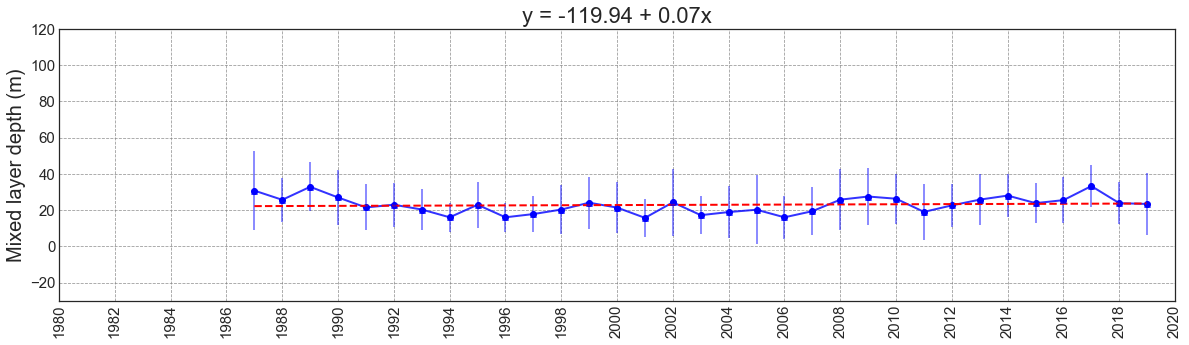

In [363]:
from matplotlib.offsetbox import AnchoredText

x = years
y = flat_meanfilteredMLDlist #[100 * i for i in flat_bananasplitmean]
e = flat_stdfilteredMLDlist #[100 * i for i in flat_bananasplitstd]

plt.style.use('seaborn-white')
plt.figure(figsize=(20, 5))
plt.ylim(-30,120)
# plt.ylim(0,20)
# plt.ylim(-40,120)
plt.xlim(1980,2020)

plt.scatter(x, y, marker='o', c='blue')
plt.errorbar(x, y, e, linestyle='None', marker='^',color='blue',alpha= 0.6)
plt.plot(x,y,linewidth = 2.0, linestyle = '-', c='blue', alpha = 0.8)

plt.ylabel('Mixed layer depth (m)', fontsize = 20)
plt.grid(b=True, which='major', color='grey', linestyle='--',alpha = 0.8)
# plt.plot(x,y,linewidth = 2.0, linestyle = '--', c='blue', alpha = 0.8)
plt.xticks([1980,1982,1984,1986,1988,1990,1992,1994,1996,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020], rotation='vertical',fontsize = 15)
plt.yticks([-20,0,20,40,60,80,100,120],fontsize = 15)
# plt.yticks([0,5,10,15,20],fontsize = 15)


# plt.yticks([-5,0,5,10,15,20,25],fontsize = 15)
# plt.yticks([-15,-10,-5,0,5,10,15,20,25,30,35],fontsize = 15)


# plt.yticks([0,5,10,15,20,25],fontsize = 15)
# # plt.axhline(y=0, color='black', linestyle='-')
plt.title('y = -119.94 + 0.07x',fontsize = 22)
a, b = best_fit(x, y)
yfit = [a + b * xi for xi in x]
# plt.plot(x, yfit)
# a = AnchoredText("5.82 - 0.00x".format(3), loc=2, pad=0.4, borderpad=1)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),c='red',linewidth = 2,linestyle = '--')
# plt.gca().add_artist(a)
plt.savefig('timeseries_winter(JFM)_WesternGoM_withstd')
plt.show()

In [364]:
y = flat_meanfilteredMLDlist #[100 * i for i in flat_bananasplitmean]
e = flat_stdfilteredMLDlist #[100 * i for i in flat_bananasplitstd]

In [365]:
print(y)

[30.8125, 25.73076923076923, 32.90243902439025, 27.022222222222222, 21.52054794520548, 23.01492537313433, 20.380281690140844, 16.076190476190476, 23.0, 16.08, 17.87037037037037, 20.35135135135135, 24.15068493150685, 21.441558441558442, 15.780821917808218, 24.333333333333332, 17.25925925925926, 18.970588235294116, 20.25925925925926, 16.075949367088608, 19.45205479452055, 25.819148936170212, 27.55, 26.333333333333332, 19.068493150684933, 22.658227848101266, 25.83076923076923, 28.074626865671643, 23.901408450704224, 25.55223880597015, 33.30769230769231, 23.880597014925375, 23.444444444444443]


In [366]:
print(e)

[21.95807956230499, 12.081581659063326, 13.525540429219049, 15.368931010452236, 12.69635729587329, 12.230727000014836, 11.57135156593102, 7.911402722671438, 12.790161660202644, 8.148719694102947, 10.140608251445975, 13.417870349805003, 14.33010742077741, 13.86446945716916, 10.401985087449075, 18.564957787661616, 10.455593930736047, 14.23467553927789, 19.144044620832986, 12.020038986133642, 13.168819545395026, 16.67782170735467, 15.874746478529216, 13.764083696345356, 15.273732687128877, 11.794051168833409, 13.925661149889383, 12.068382725166014, 10.919386337515839, 12.613465126108771, 11.568125970162084, 11.411746192118201, 17.0945897874152]


In [367]:
print(years)

[1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


In [368]:
y = [100 * i for i in flat_bananasplitmean]
e = [100 * i for i in flat_bananasplitstd]

In [369]:
print(y)

[49.98204755881757, 68.44558466700596, 73.006079560968, 55.10923078218703, 49.03449202612406, 54.24866629260602, 50.591544426342736, 36.182328633544124, 59.024316504567174, 43.64087329008624, 41.92636895440721, 44.23276749215555, 52.85681065468227, 43.20218956666565, 37.254687249148844, 48.51018682111196, 39.423453892903375, 42.767754485674985, 38.53733207951795, 34.95193276568464, 43.77138269412342, 52.92878179240334, 48.36443806276189, 49.769464004764124, 38.10724208721931, 39.546836927168535, 45.625522626806436, 48.88856962050422, 43.68603423743653, 45.26151854474648, 60.956147833665554, 49.67700339541586, 37.11757273807868]


In [370]:
print(e)

[32.23248081869434, 22.472612273891496, 22.11251695877329, 32.14256545958259, 24.32532119648501, 25.913750115253194, 29.66756562778075, 27.254998741387197, 29.795929139199416, 28.22567935233443, 21.765344606887716, 26.565073103495497, 23.068242144955022, 24.003908481155413, 24.00223241752343, 27.478969383897006, 25.631156368191064, 26.382865201080147, 26.178800555794023, 22.634405477008205, 26.60628085873182, 28.139074881425906, 28.328179967849447, 31.576990646018654, 31.064796484890877, 26.108809719875453, 26.397284362510458, 26.373569897117218, 27.572690983954384, 27.98686711305274, 29.26136655362705, 27.37508202529949, 24.544176612433517]


In [35]:
import matplotlib.pyplot as plt
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    pvalue: %f" % (slope, p_value))
print("R-squared: %f" % r_value**2)

slope: 0.097745    pvalue: 0.687816
R-squared: 0.007148


best fit line:
y = -143.43 + 0.08x


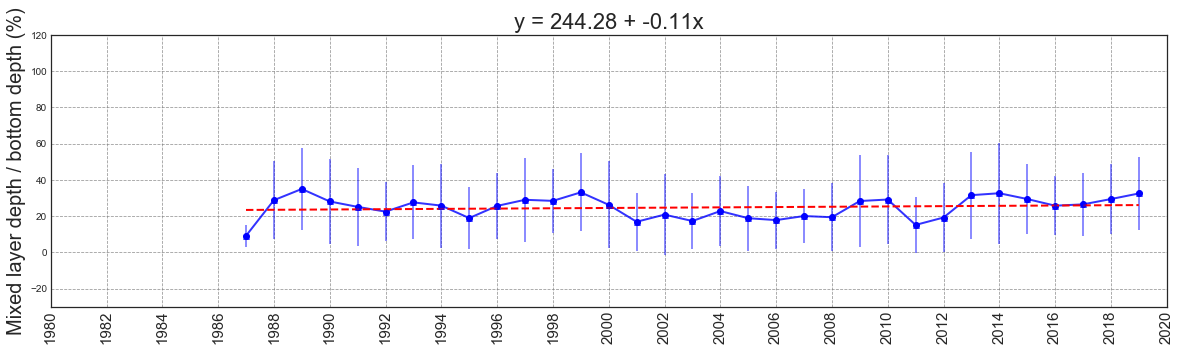

In [601]:
from matplotlib.offsetbox import AnchoredText

x = years
y = [100 * i for i in flat_bananasplitmean]
e = [100 * i for i in flat_bananasplitstd]

plt.style.use('seaborn-white')
plt.figure(figsize=(20, 5))
plt.ylim(-30,120)
# plt.ylim(-5,60)
plt.xlim(1980,2020)

plt.scatter(x, y, marker='o', c='blue')
plt.errorbar(x, y, e, linestyle='None', marker='^',color='blue',alpha= 0.6)
plt.plot(x,y,linewidth = 2.0, linestyle = '-', c='blue', alpha = 0.8)

plt.ylabel('Mixed layer depth / bottom depth (%)', fontsize = 20)
plt.grid(b=True, which='major', color='grey', linestyle='--',alpha = 0.8)
# plt.plot(x,y,linewidth = 2.0, linestyle = '--', c='blue', alpha = 0.8)
plt.xticks([1980,1982,1984,1986,1988,1990,1992,1994,1996,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020], rotation='vertical',fontsize = 15)
# plt.yticks([0, 15, 30,45, 60,75,90,105,120,135,150],fontsize = 15)
# # plt.axhline(y=0, color='black', linestyle='-')
plt.title('y = 244.28 + -0.11x',fontsize = 22)
a, b = best_fit(x, y)
yfit = [a + b * xi for xi in x]
# plt.plot(x, yfit)
# a = AnchoredText("5.82 - 0.00x".format(3), loc=2, pad=0.4, borderpad=1)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),c='red',linewidth = 2,linestyle = '--')
# plt.gca().add_artist(a)
plt.savefig('timeseries_winter(JFM)_WesternGoM_withstd')
plt.show()

In [602]:
import matplotlib.pyplot as plt
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    pvalue: %f" % (slope, p_value))
print("R-squared: %f" % r_value**2)

slope: 0.083988    pvalue: 0.456440
